In [4]:
import numpy as np
import matplotlib.pyplot as plt

from lib.grid import Grid
from lib.fiber import GrinFiber
from lib.speckle import DegenGrinSpeckle
from lib.transforms import fourier_transform, fresnel_transform

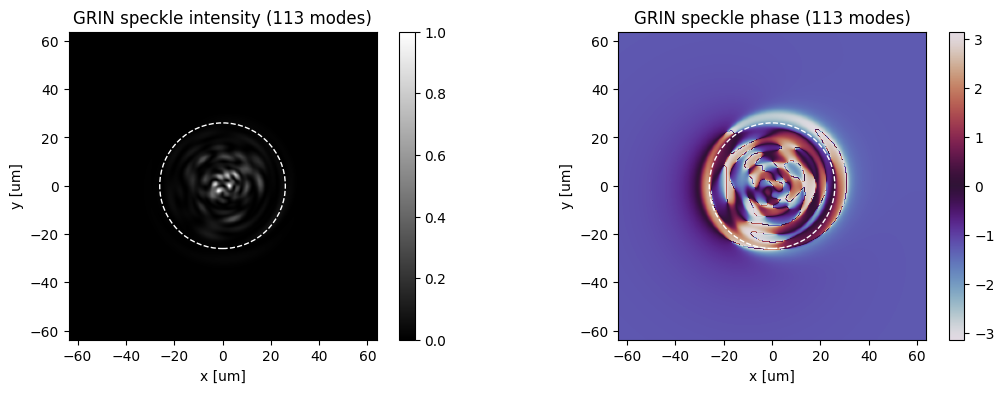

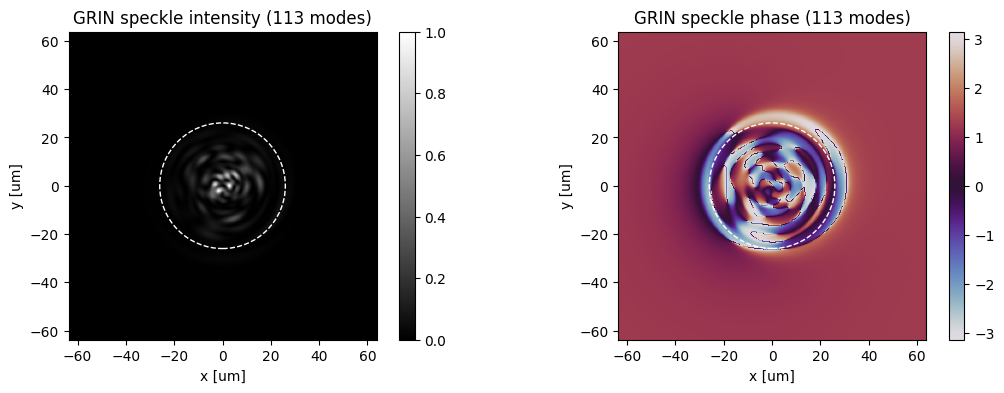

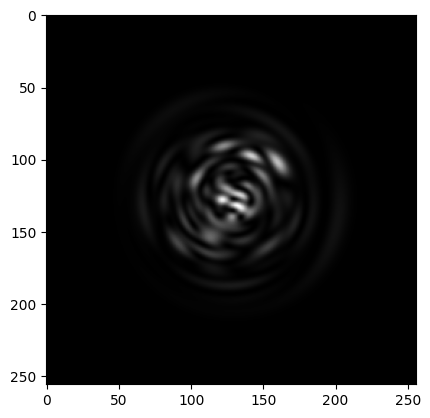

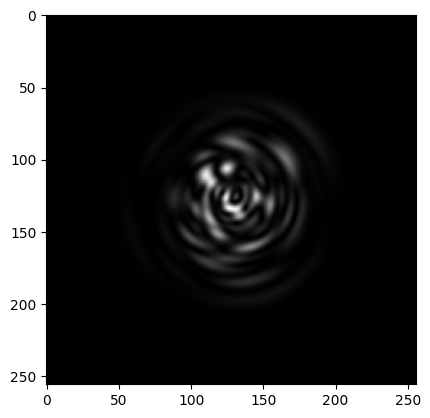

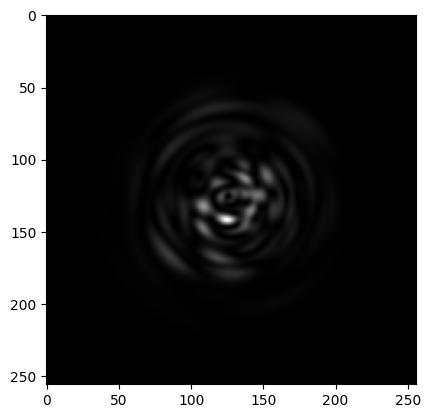

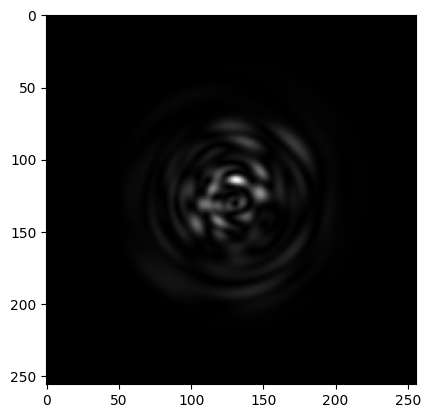

In [5]:
grid = Grid(pixel_size=0.5e-6, pixel_numbers=(256,256))
fiber = GrinFiber()
speckle1 = DegenGrinSpeckle(fiber, grid, N_modes=fiber._N_modes_degen)
speckle1.compose()

speckle2 = DegenGrinSpeckle(fiber, grid, N_modes=fiber._N_modes_degen)
speckle2.compose(coeffs=np.conj(speckle1.modes_coeffs))

speckle1.plot(complex=True)
speckle2.plot(complex=True)

fres1 = fresnel_transform(speckle1.field, grid, delta_z=100e-6, pad=2)
fres2 = fresnel_transform(speckle2.field, grid, delta_z=100e-6, pad=2)
four1 = fourier_transform(speckle1.field, pad=2)
four2 = fourier_transform(speckle2.field, pad=2)

plt.figure()
plt.imshow(np.square(np.abs(fres1)), cmap='gray')
plt.show()

plt.imshow(np.square(np.abs(fres2)), cmap='gray')
plt.show()

plt.imshow(np.square(np.abs(four1)), cmap='gray')
plt.show()
plt.imshow(np.square(np.abs(four2)), cmap='gray')
plt.show()


In [9]:
np.save('./grin_speckle_example.npy', speckle1.field)